In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

<hr>

# Columns Name
* ## Age
* ## Sex
* ## Blood Pressure Levels (BP)
* ## Cholesterol Levels
* ## Na to Potassium Ration
* ## Drug type ( Target )
<br> <hr>

In [2]:
path = "/kaggle/input/drug200/drug200.csv"

drug_df = pd.read_csv(path)

# Explore & Analysis Phase
---
<br><br><br>

## Show 10 samples from the data to discover it

In [3]:
drug_df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
160,30,F,NORMAL,HIGH,10.443,drugX
191,23,M,HIGH,HIGH,8.011,drugA
4,61,F,LOW,HIGH,18.043,DrugY
198,23,M,NORMAL,NORMAL,14.020,drugX
90,62,M,NORMAL,HIGH,16.594,DrugY
16,69,M,LOW,NORMAL,11.455,drugX
149,22,M,LOW,HIGH,8.151,drugC
195,56,F,LOW,HIGH,11.567,drugC
145,61,M,NORMAL,HIGH,9.443,drugX
158,59,F,LOW,HIGH,10.444,drugC


## get information about the dataset

In [4]:
drug_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## Show unique values and it's count in the categorical columns

In [5]:
columns_name = drug_df.select_dtypes(include = "object").columns
for column in columns_name:
    print(f"{drug_df[column].value_counts()} \n-----------\n")

Sex
M    104
F     96
Name: count, dtype: int64 
-----------

BP
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64 
-----------

Cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64 
-----------

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64 
-----------



In [6]:
drug_df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

# Show count of Categorical data & if there outlier in numerical 

<Axes: xlabel='Na_to_K'>

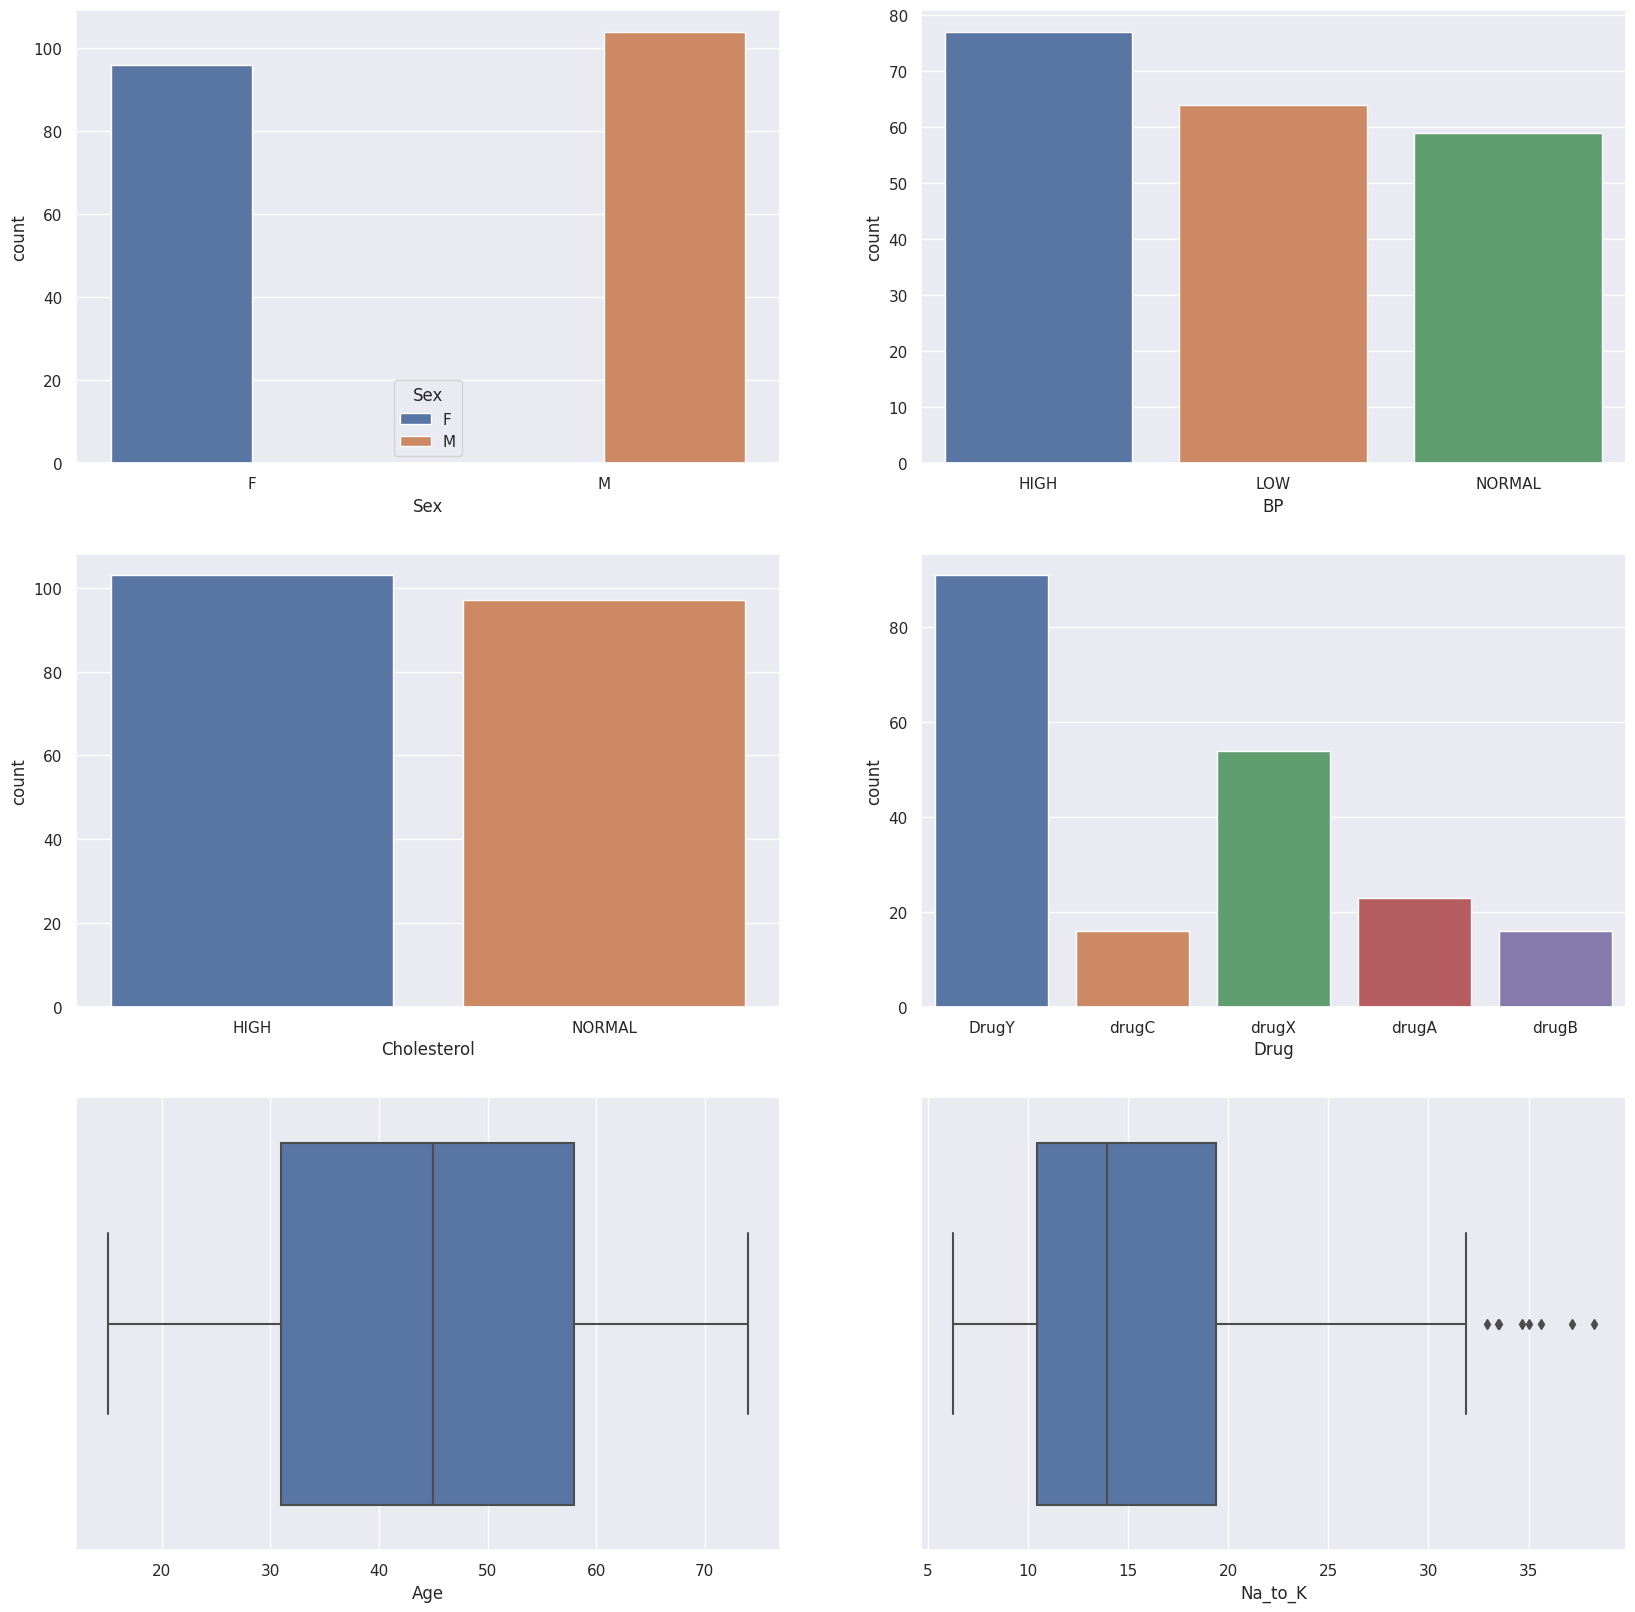

In [7]:
figure , ax = plt.subplots(3,2,figsize=(20,20))


sns.countplot(ax=ax[0,0],x=drug_df["Sex"],hue=drug_df["Sex"])
sns.countplot(ax=ax[0,1],x=drug_df["BP"])
sns.countplot(ax=ax[1,0],x=drug_df["Cholesterol"])
sns.countplot(ax=ax[1,1],x=drug_df["Drug"])
sns.boxplot(ax=ax[2,0],x=drug_df["Age"])
sns.boxplot(ax=ax[2,1],x=drug_df["Na_to_K"])

# -->> We found that Drug columns have imbalanced categories 
# -->> Na_to_K columns have some outliers

# Describe the numerical columns in statical way

In [8]:
drug_df.describe().round(2)

,Age,Na_to_K
count,200.00,200.00
mean,44.32,16.08
std,16.54,7.22
min,15.00,6.27
25%,31.00,10.45
50%,45.00,13.94
75%,58.00,19.38
max,74.00,38.25


## Show Trends in the numerical data

array([<Axes: >, <Axes: >], dtype=object)

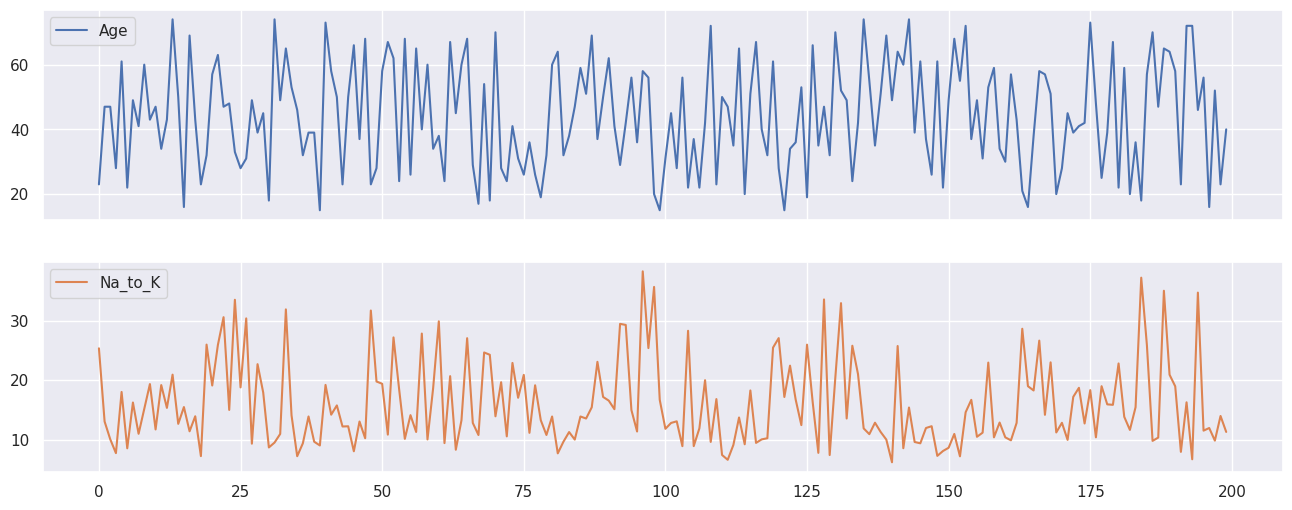

In [9]:
drug_df.plot(subplots= True,figsize=(16,6))

## Show if there is Null values

In [10]:
drug_df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

# Show if there is duplicatied data

In [11]:
drug_df.duplicated().sum()

0

# Now will apply IQR on Na_to_K Column

In [12]:
percent_25=  np.percentile(drug_df["Na_to_K"],25)
print(percent_25)
percent_75=  np.percentile(drug_df["Na_to_K"],75)
print(percent_75)

10.4455
19.38


In [13]:
IQR = percent_75 - percent_25 
IQR

8.9345

In [14]:
upper_filter = percent_75 + (IQR*1.5)
lower_filter = percent_25 - (IQR*1.5)

print(f"lower is  {lower_filter},  and upper is {upper_filter}")

lower is  -2.9562500000000007,  and upper is 32.78175


In [15]:
na_k_median=drug_df["Na_to_K"].median()
na_k_median

13.9365

In [16]:
drug_df[(drug_df["Na_to_K"] > upper_filter) | (drug_df["Na_to_K"] < lower_filter)]["Na_to_K"] =na_k_median

<ipython-input-16-3e2c8643a596>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_df[(drug_df["Na_to_K"] > upper_filter) | (drug_df["Na_to_K"] < lower_filter)]["Na_to_K"] =na_k_median


In [17]:
# drug_df = drug_df[(drug_df["Na_to_K"] < upper_filter) & (drug_df["Na_to_K"] > lower_filter)]



In [18]:
drug_df.reset_index(inplace=True)

In [19]:
drug_df["Na_to_K"].head()

0    25.355
1    13.093
2    10.114
3     7.798
4    18.043
Name: Na_to_K, dtype: float64

In [20]:
drug_df["Na_to_K"].describe()

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

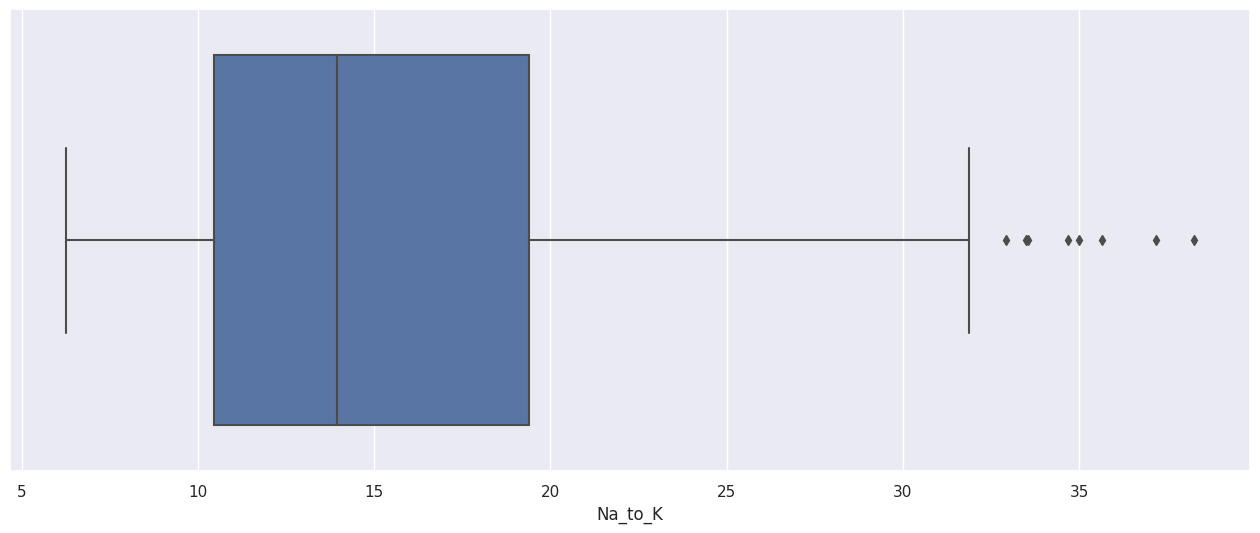

In [21]:
plt.figure(figsize=(16,6))

sns.boxplot(x=drug_df["Na_to_K"])
plt.show

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1600x1000 with 0 Axes>

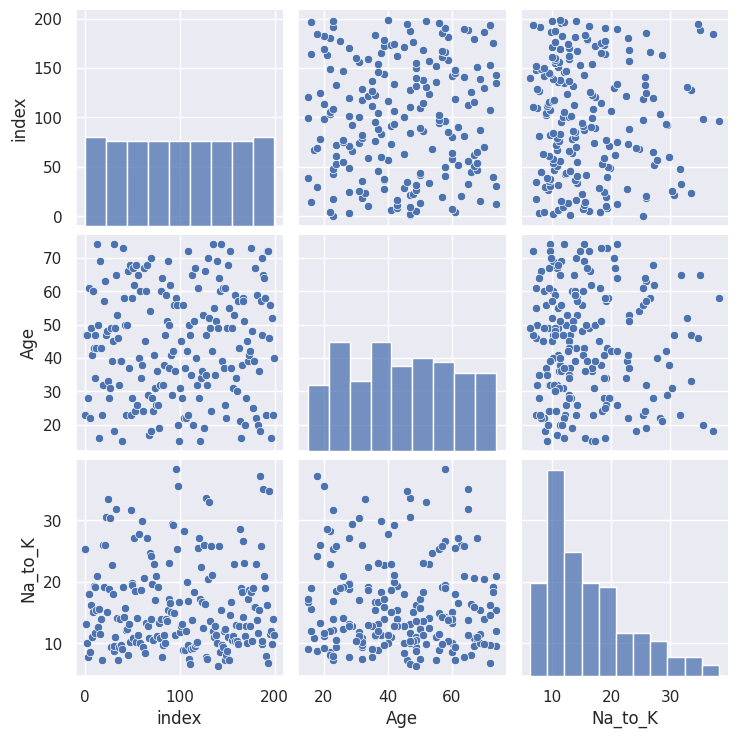

In [22]:
plt.figure(figsize=(16,10))
sns.pairplot(drug_df)
plt.show()

In [23]:
drug_df.head()

,index,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0,23,F,HIGH,HIGH,25.355,DrugY
1,1,47,M,LOW,HIGH,13.093,drugC
2,2,47,M,LOW,HIGH,10.114,drugC
3,3,28,F,NORMAL,HIGH,7.798,drugX
4,4,61,F,LOW,HIGH,18.043,DrugY


# Visulization 

In [24]:
fig= plt.figure(figsize=(16,6))
sh= plt.show()

<Figure size 1600x600 with 0 Axes>

# Lets see if there a ralation between person age and his Na to K ratio

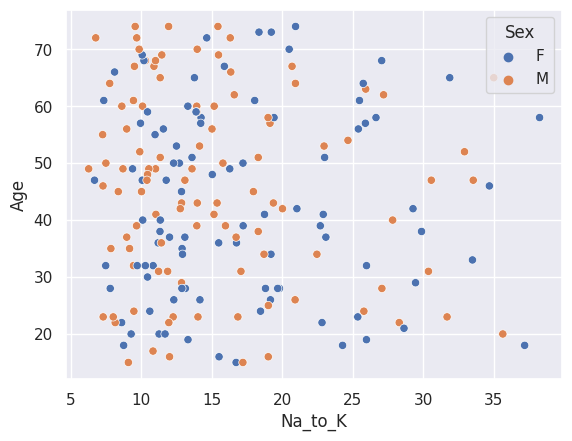

In [25]:
fig
sns.scatterplot(x= drug_df["Na_to_K"],y=drug_df["Age"],hue= drug_df["Sex"])
sh

### Here we found that there isn't any relation between person age and his Na to K ratio
<hr>

# See if there is relation between person age and his blood level

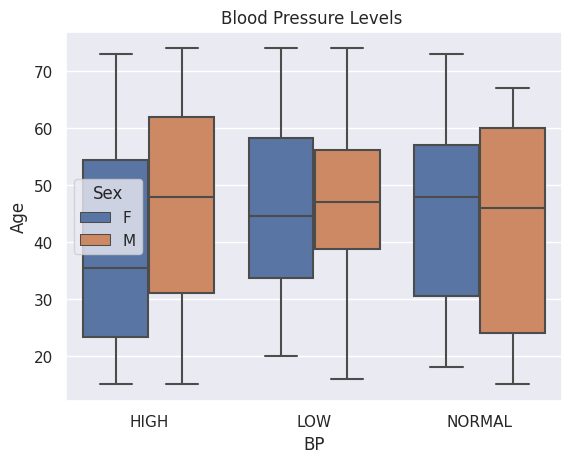

In [26]:
fig
sns.boxplot(x= drug_df["BP"],y=drug_df["Age"],hue= drug_df["Sex"])
plt.title("Blood Pressure Levels ")
sh

### Here found that there isn't relation between person age and his Blood pressure Level
<hr>

# Here We see if Na to K ratio Affect on drug type you should have

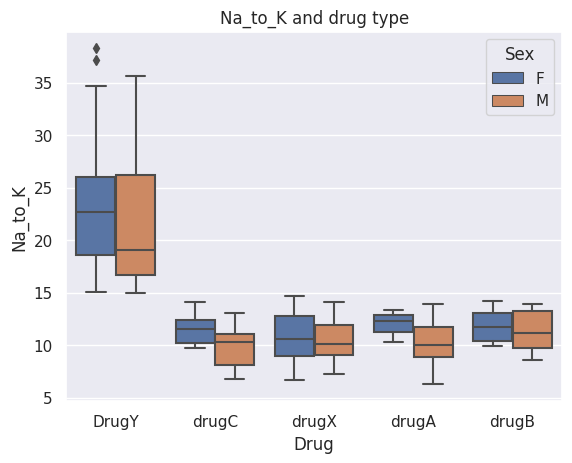

In [27]:
fig
sns.boxplot(x= drug_df["Drug"],y=drug_df["Na_to_K"],hue= drug_df["Sex"])
plt.title("Na_to_K and drug type")
sh

### here we see if  Na_to_K ration between 5 to 15 don't affect can take  A or b or C or X 
### but if high than 15 it be drug Y  

In [28]:
drug_df.columns

Index(['index', 'Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

# Lets see if there relation between Na_to_K ration and Blood pressure

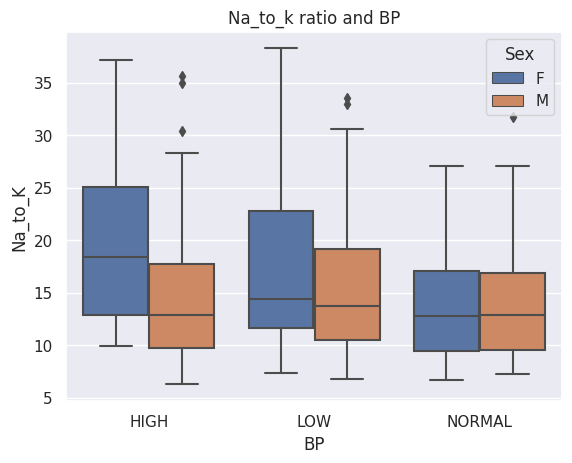

In [29]:
fig
sns.boxplot(x= drug_df["BP"],y=drug_df["Na_to_K"],hue= drug_df["Sex"])
plt.title("Na_to_k ratio and BP")
sh

# We found that Na_to_k ration there isn't strong relation between it and the BP
<hr>

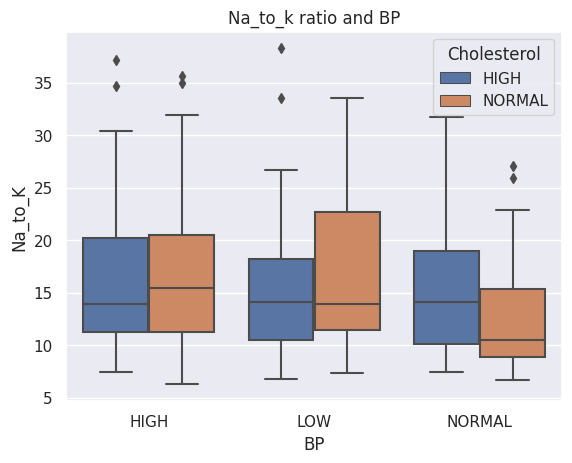

In [30]:
fig
sns.boxplot(x= drug_df["BP"],y=drug_df["Na_to_K"],hue= drug_df["Cholesterol"])
plt.title("Na_to_k ratio and BP")
sh

<hr>

# Is the age effect on the drug type that patient should take ?

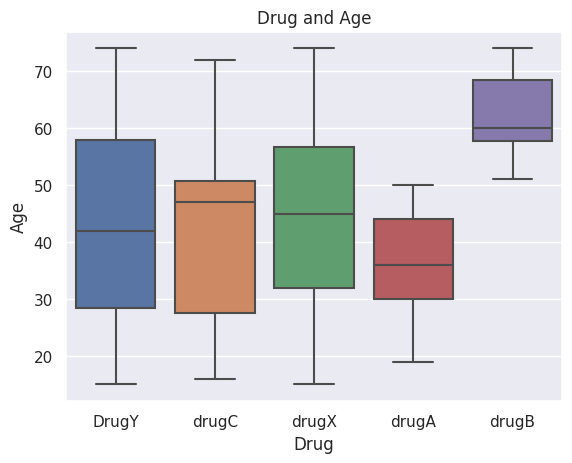

In [31]:
fig
sns.boxplot(x= drug_df["Drug"],y=drug_df["Age"])
plt.title("Drug and Age")
sh

### Yes, DrugB is primarily prescribed to older individuals above 60, while DrugA is more common among younger patients. The remaining drugs show similar patterns and are prescribed across a broader and overlapping age range
<hr>

# is Cholesterol level effect on the drug type that should be taken ?

In [32]:
chol_drug = pd.crosstab(drug_df["Drug"],drug_df["Cholesterol"])
chol_drug

Cholesterol,HIGH,NORMAL
Drug,,
DrugY,47,44
drugA,12,11
drugB,8,8
drugC,16,0
drugX,20,34


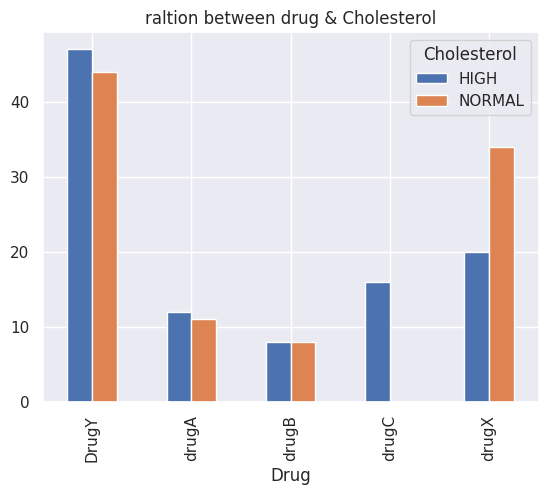

In [33]:
fig
chol_drug.plot(kind="bar",)
plt.title("raltion between drug & Cholesterol")
sh

### Most drugs are prescribed for both high and normal cholesterol levels fairly equally, except DrugC, which appears to be prescribed exclusively for patients with high cholesterol.

<hr>

# is BP level effect on the drug type that should be taken ?

In [34]:
Bp_drug = pd.crosstab(drug_df["Drug"],drug_df["BP"])
Bp_drug

BP,HIGH,LOW,NORMAL
Drug,,,
DrugY,38,30,23
drugA,23,0,0
drugB,16,0,0
drugC,0,16,0
drugX,0,18,36


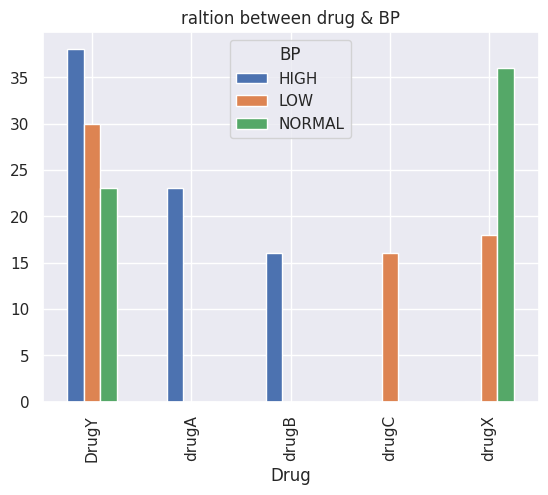

In [35]:
fig
Bp_drug.plot(kind="bar",)
plt.title("raltion between drug & BP")
sh

### Here we Found that Drug Y deals with all BP levels, Drug A & B deal only with High levels, Drug C only deals with low levels, Drug X deals with Low and normal levels, but is more common with normal levels.
<hr>
<br><br>

# Does any drug target only one sex (male/female)?

In [36]:
sex_drug = pd.crosstab(drug_df["Drug"],drug_df["Sex"])
sex_drug

Sex,F,M
Drug,,
DrugY,47,44
drugA,9,14
drugB,6,10
drugC,7,9
drugX,27,27


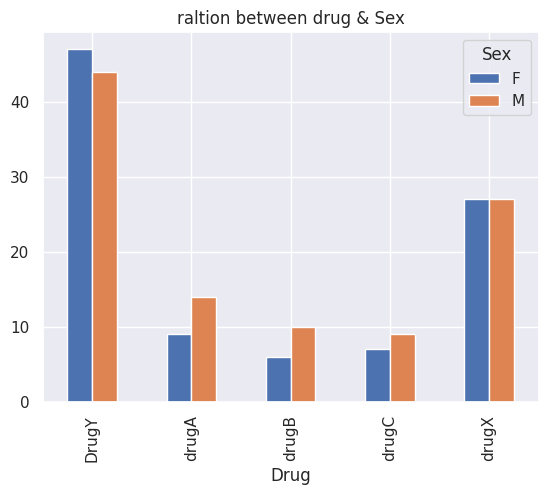

In [37]:
fig
sex_drug.plot(kind="bar",)
plt.title("raltion between drug & Sex")
sh

#  Here, We found that all the drugs are effective for both genders.
<hr>
<br><br>

# **Drug Prescription Analysis Insights**

### **1. Demographic & Biological Factors**
#### **Age & Drug Prescription**
* **DrugB** is mainly prescribed to patients **above 60 years**
* **DrugA** is more common among **younger patients**
* Other drugs (**C, X, Y**) show overlapping age distributions

#### **Gender & Effectiveness**
* All drugs work equally well for **both genders**

#### **Blood Pressure (BP) Patterns**
* **DrugA & DrugB**: Only for **high BP**
* **DrugC**: Only for **low BP**  
* **DrugX**: For **low/normal BP** (more common with normal)
* **DrugY**: Covers **all BP levels**

#### **Cholesterol Levels**
* Most drugs (**A, B, X, Y**) are prescribed for both **high/normal cholesterol**
* **DrugC**: Only for **high cholesterol**

---

### **2. Sodium-Potassium (Na_to_K) Ratio Rules**
* **General Rule**:
  - Na_to_K **5-15** → May get **Drug A/B/C/X**
  - Na_to_K **>15** → Almost always **Drug Y**
* **Gender Difference**:
  - Females with **high BP** have higher average Na_to_K than males
  - Other BP categories show minimal gender differences

---

### **3. Non-Correlations**
* No relationship between:
  - Age ↔ Na_to_K ratio
  - Age ↔ Blood Pressure

---

### **Prescription Summary Table**
| Drug | Age Target      | BP Levels       | Cholesterol   | Na_to_K Threshold |
|------|----------------|----------------|--------------|-------------------|
| **A**| Younger        | High only       | High/Normal  | 5-15              |
| **B**| **60+ yrs**    | High only       | High/Normal  | 5-15              |
| **C**| All ages       | **Low only**    | **High only**| 5-15              |
| **X**| All ages       | Low/Normal      | High/Normal  | 5-15              |
| **Y**| All ages       | **All levels**  | High/Normal  | **>15**           |

---
<br><br><br>

# Machine Learning phase

In [38]:
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
from sklearn.model_selection import GridSearchCV , KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report ,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


steps 
* encoding
* write the pipeline in it ( model , paramter )
* make loop run on the steps by grid search
* every model make train inside the loop 

In [39]:
ml_df=drug_df.copy()

In [40]:
ml_df["Drug"].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [41]:
lab_encod= LabelEncoder()
ml_df["Drug"]= lab_encod.fit_transform(ml_df["Drug"])

In [42]:
ml_df["Drug"].unique()

array([0, 3, 4, 1, 2])

In [43]:
encoder = OneHotEncoder( sparse_output=False,drop='first')
cat_col= list(ml_df.select_dtypes(include=['object']).columns)
one_hot_encoded = encoder.fit_transform(ml_df[cat_col])

one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(cat_col))

df_encoded = pd.concat([ml_df, one_hot_df], axis=1)


In [44]:
df_encoded.sample(10)

,index,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
30,30,18,F,NORMAL,NORMAL,8.750,4,0.0,0.0,1.0,1.0
62,62,67,M,LOW,NORMAL,20.693,0,1.0,1.0,0.0,1.0
109,109,23,M,NORMAL,HIGH,16.850,0,1.0,0.0,1.0,0.0
99,99,15,F,HIGH,NORMAL,16.725,0,0.0,0.0,0.0,1.0
36,36,32,M,HIGH,NORMAL,9.445,1,1.0,0.0,0.0,1.0
13,13,74,F,LOW,HIGH,20.942,0,0.0,1.0,0.0,0.0
45,45,66,F,NORMAL,NORMAL,8.107,4,0.0,0.0,1.0,1.0
37,37,39,M,LOW,NORMAL,13.938,4,1.0,1.0,0.0,1.0
47,47,68,M,LOW,HIGH,10.291,3,1.0,1.0,0.0,0.0
156,156,31,M,HIGH,NORMAL,11.227,1,1.0,0.0,0.0,1.0


In [45]:
df_encoded=df_encoded.drop(cat_col,axis=1)
df_encoded

,index,Age,Na_to_K,Drug,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,0,23,25.355,0,0.0,0.0,0.0,0.0
1,1,47,13.093,3,1.0,1.0,0.0,0.0
2,2,47,10.114,3,1.0,1.0,0.0,0.0
3,3,28,7.798,4,0.0,0.0,1.0,0.0
4,4,61,18.043,0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
195,195,56,11.567,3,0.0,1.0,0.0,0.0
196,196,16,12.006,3,1.0,1.0,0.0,0.0
197,197,52,9.894,4,1.0,0.0,1.0,0.0
198,198,23,14.020,4,1.0,0.0,1.0,1.0


In [46]:
X = df_encoded.drop("Drug",axis=1)
y = df_encoded["Drug"]


In [47]:
X.drop("index",axis=1,inplace=True)
X

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0.0,0.0,0.0,0.0
1,47,13.093,1.0,1.0,0.0,0.0
2,47,10.114,1.0,1.0,0.0,0.0
3,28,7.798,0.0,0.0,1.0,0.0
4,61,18.043,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
195,56,11.567,0.0,1.0,0.0,0.0
196,16,12.006,1.0,1.0,0.0,0.0
197,52,9.894,1.0,0.0,1.0,0.0
198,23,14.020,1.0,0.0,1.0,1.0


In [48]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42,stratify=y)

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
pipeliness={
    "Logistc": { "pipeline" : Pipeline([("clf",LogisticRegression())]) 
                ,"param": {
                    'clf__C': [0.1, 1, 10],'clf__penalty': ['l2','l1'],'clf__solver': ['lbfgs', 'liblinear']} },

   
    "Knn": { "pipeline" : Pipeline([("clf",KNeighborsClassifier())]) 
                ,"param": {
                    'clf__n_neighbors': [3,5,7,9,11],'clf__weights':['uniform', 'distance'],'clf__metric':['eucldiean','manhattan']} },
   
  
    "DeTree": { "pipeline" : Pipeline([("clf",DecisionTreeClassifier())]) 
                ,"param": {
                    "clf__max_depth":[2,3,5,7,None], "clf__min_samples_split":[2,5,7,10] } },
   
  
    "Randfore": { "pipeline" : Pipeline([("clf",RandomForestClassifier())]) 
                ,"param": {
                    "clf__n_estimators":[100,200,400,600], "clf__max_depth":[3,5,7,None],'clf__min_samples_split': [2, 5,8]} },

    
    "svm": { "pipeline" : Pipeline([("clf",SVC())]) 
                ,"param": {
                    'clf__C': [0.1, 1, 10],'clf__kernel': ['linear','rbf','poly'],'clf__gamma': ['scale', 'auto'],"clf__degree":[1,2,3]} },
}




best_models = {}
results=[]
# kf=KFold(n_splits=3 )
for name , config in pipeliness.items():

    model_cv= GridSearchCV(
        estimator= config["pipeline"],
        param_grid= config["param"],
        
        n_jobs=-1, # this we used to make grid search use all cpuu Cores to make it fast
        scoring='accuracy')
    
    model_cv.fit(X_train,y_train)

    best_models[name]=model_cv.best_estimator_

    y_pred = model_cv.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    
    results.append({
        'model':name,
        'best_param':model_cv.best_params_,
        'accuracy' : accuracy,
        'best_estimator':model_cv.best_estimator_
        
    })
    print(f"\n Model name is {name} \n ")
    print(f"Best Paramters {model_cv.best_params_}")
    print(f"\n \n Accuracy : {accuracy:.3f}")
    print(f"\n \n Classifcation report \n {classification_report(y_test,y_pred)}")
    print(f"\n \n \n Confusion matirx \n {confusion_matrix(y_test,y_pred) }")
    print("====================================================================")


result_df = pd.DataFrame(results).sort_values('accuracy',ascending=False)



result_df.head()
print("------------- Final Result -------------")


    


 Model name is Logistc 
 
Best Paramters {'clf__C': 10, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}

 
 Accuracy : 0.920

 
 Classifcation report 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        23
           1       1.00      1.00      1.00         6
           2       1.00      0.50      0.67         4
           3       1.00      1.00      1.00         4
           4       0.92      0.92      0.92        13

    accuracy                           0.92        50
   macro avg       0.96      0.88      0.90        50
weighted avg       0.92      0.92      0.92        50


 
 
 Confusion matirx 
 [[22  0  0  0  1]
 [ 0  6  0  0  0]
 [ 2  0  2  0  0]
 [ 0  0  0  4  0]
 [ 1  0  0  0 12]]

 Model name is Knn 
 
Best Paramters {'clf__metric': 'manhattan', 'clf__n_neighbors': 7, 'clf__weights': 'distance'}

 
 Accuracy : 0.780

 
 Classifcation report 
               precision    recall  f1-score   support

           0       

In [51]:
result_df

,model,best_param,accuracy,best_estimator
2,DeTree,"{'clf__max_depth': 5, 'clf__min_samples_split'...",0.98,(DecisionTreeClassifier(max_depth=5))
4,svm,"{'clf__C': 1, 'clf__degree': 1, 'clf__gamma': ...",0.98,"(SVC(C=1, degree=1, kernel='linear'))"
3,Randfore,"{'clf__max_depth': 3, 'clf__min_samples_split'...",0.98,"((DecisionTreeClassifier(max_depth=3, max_feat..."
0,Logistc,"{'clf__C': 10, 'clf__penalty': 'l1', 'clf__sol...",0.92,"(LogisticRegression(C=10, penalty='l1', solver..."
1,Knn,"{'clf__metric': 'manhattan', 'clf__n_neighbors...",0.78,"(KNeighborsClassifier(metric='manhattan', n_ne..."


In [52]:
print(f"Best model is {result_df.iloc[0][['model']]} ")
print(f"And his accuracy is {result_df.iloc[0]['accuracy']}")

Best model is model    DeTree
Name: 2, dtype: object 
And his accuracy is 0.98


In [53]:
best_model_name = result_df.iloc[0]['model']
best_model = best_models[best_model_name]
best_model

Pipeline(steps=[('clf', DecisionTreeClassifier(max_depth=5))])

In [54]:
drug_df.iloc[0]

index               0
Age                23
Sex                 F
BP               HIGH
Cholesterol      HIGH
Na_to_K        25.355
Drug            DrugY
Name: 0, dtype: object

In [55]:
def preprocess(data):
    new_df = pd.DataFrame(data)
    new_encoded_X=encoder.transform(new_df[cat_col])
    
    one_hot_df = pd.DataFrame(new_encoded_X, columns=encoder.get_feature_names_out(cat_col))
    
    new_encoded = pd.concat([new_df, one_hot_df], axis=1)
    new_encoded.drop(cat_col,axis=1,inplace=True)
    return new_encoded



new_data = {
    'Age': [23], 
    'Sex': ['F'], 
    'BP': ['HIGH'], 
    'Cholesterol': ['HIGH'], 
    'Na_to_K': [25]
}

ready_data=preprocess(new_data)

new_pred=best_model.predict(ready_data)
new_pred

array([0])

In [56]:
new_pred= lab_encod.inverse_transform(new_pred)
new_pred

array(['DrugY'], dtype=object)

In [57]:
import joblib
joblib.dump(best_model, 'Drug_classifier.pkl')
joblib.dump(lab_encod, 'Target_encoder.pkl')
joblib.dump(encoder, 'Feature_encoder.pkl')

['Feature_encoder.pkl']

# Drug Classification Model Report

## 📊 Model Performance Summary
**Best Models:**  
- **Decision Tree Classifier**  
- **Random Forest Classifier**
- **Support Vector Classifier** 
**Achieved Accuracy:** 98%  

## 🔍 Spliting Data

- **Train Data is 75%**
- **Test Data is 25%**

## 🧩 Used Models and Accuracy

- **Decision Tree -->> 98%**
- **Random Forest -->> 98%**
- **Support Vector Classifier (SVC) -->> 98%**
- **Logistic Regression -->> 92%**
- **KNeighbors -->> 78%**

## 🤖 Encoding
- **Target -->> LabelEncoder**
- **Categorical Features -->> OneHotEncoder**